# Splitters
* Divide a large data asset in small parts.

In [1]:
#pip install python-dotenv

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

#### Install LangChain

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [3]:
#!pip install langchain

## Connect with an LLM

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [4]:
#!pip install langchain-openai

* NOTE: Since right now is the best LLM in the market, we will use OpenAI by default. You will see how to connect with other Open Source LLMs like Llama3 or Mistral in a next lesson.

## Reminder: steps of the RAG process.
* When you load a document, you end up with strings. Sometimes the strings will be too large to fit into the context window. In those occassions we will use the RAG technique:
    * **Split document in small chunks**.
    * Transform text chunks in numeric chunks (embeddings).
    * Load embeddings to a vector database (aka vector store).
    * Load question and retrieve the most relevant embeddings to respond it.
    * Sent the embeddings to the LLM to format the response properly.

## Splitters: divide the loaded document in small chunks of text
* Also called "Document Transformers".
* See the documentation page [here](https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/).
* See the list of built-in splitters [here](https://python.langchain.com/v0.1/docs/integrations/document_transformers/).

#### Simple splitting by character: Character Splitter
* This splits based on characters (by default "\n\n") and measure chunk length by number of characters.
* The "Character Splitter" in the context of RAG (Retrieval-Augmented Generation) applications, specifically using LangChain's tools, is a method that divides text into smaller parts based on specific characters.
* By default, it uses double newline characters ("\n\n") to identify where one chunk of text ends and another begins.
* Each chunk is measured by its number of characters.
* This simple splitting method is useful in RAG applications to help manage and process large blocks of text by breaking them down into manageable, smaller pieces. This can enhance the efficiency and effectiveness of the text retrieval process, which is crucial in generating accurate and contextually relevant responses.

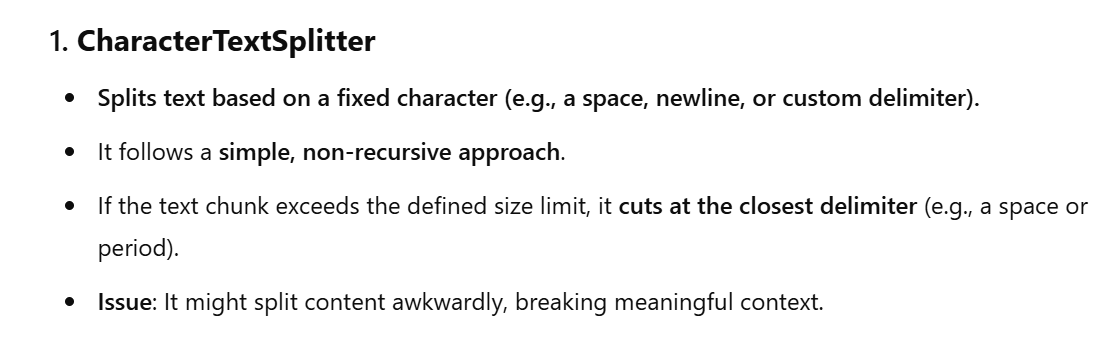

Here's a simple example to illustrate how the "Character Splitter" works in the context of RAG applications using the default delimiter ("\n\n").

#### Original Text:
```
Hello, welcome to our store!

\n\nWe offer a variety of products ranging from electronics to clothing.

\n\nOur store hours are 9 AM to 9 PM every day.

\n\nFeel free to ask for assistance if you need help finding anything.
```

#### After Applying Character Splitter:
1. **Chunk 1:**
   ```
   Hello, welcome to our store!
   ```

2. **Chunk 2:**
   ```
   We offer a variety of products ranging from electronics to clothing.
   ```

3. **Chunk 3:**
   ```
   Our store hours are 9 AM to 9 PM every day.
   ```

4. **Chunk 4:**
   ```
   Feel free to ask for assistance if you need help finding anything.
   ```

In this example, the text is split into four chunks based on the presence of "\n\n" between sections of text. Each chunk is a manageable size and clearly separated from the others, making it easier for a RAG system to handle and retrieve information from specific parts of the text as needed.

In [2]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("./data/be-good.txt")

loaded_data = loader.load()

In [26]:
loaded_data

[Document(metadata={'source': './data/be-good.txt'}, page_content='Be good\n\nApril 2008(This essay is derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by reductio ad absurdum that o

In [4]:
loaded_data[0].page_content

'Be good\n\nApril 2008(This essay is derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by reductio ad absurdum that one\nor both of the principles we began with is false.  Or we have 

In [15]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    #separator="\n",
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

In [16]:
texts = text_splitter.create_documents([loaded_data[0].page_content])

In [17]:
len(texts)

2

In [18]:
texts[0]

Document(page_content='Be good')

In [19]:
texts[1]

Document(page_content='April 2008(This essay is derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by reductio ad absurdum that one\nor both of the principles we began with is false.  

#### Splitting with metadata

In [32]:
metadatas = [{"chunk": 0}, {"chunk": 1}]

documents = text_splitter.create_documents(
    [loaded_data[0].page_content, loaded_data[0].page_content], 
    metadatas=metadatas
)

In [33]:
documents

[Document(metadata={'chunk': 0}, page_content='Be good'),
 Document(metadata={'chunk': 0}, page_content='April 2008(This essay is derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by 

The `CharacterTextSplitter` from LangChain's text splitting utilities helps break down text into manageable chunks along with the option to attach metadata to each chunk. Here’s how it works in simple terms:

1. **Initialization of the Splitter**: The splitter is configured with several parameters:
   - `separator`: This is the character or string at which the text will be split. In this example, it’s set to `"\n\n"`, which means the text will be divided at every occurrence of double newlines.
   - `chunk_size`: This determines the maximum size of each chunk in characters. Here, each chunk can be up to 1000 characters long.
   - `chunk_overlap`: This allows chunks to overlap by a specified number of characters, set here to 200. Overlapping helps ensure that no crucial information is cut off awkwardly at the end of a chunk.
   - `length_function`: This is typically a function to measure the length of the text; `len` simply counts the number of characters.
   - `is_separator_regex`: This indicates whether the separator is a regular expression or not. Here, it’s `False`, meaning the separator is treated as a literal string.

2. **Creating Chunks**: The `create_documents` method is used to split the text. It takes in the text (or texts) and optional metadata, and splits the text based on the defined parameters.

3. **Attaching Metadata**: Optionally, metadata can be attached to each chunk to provide additional context or identifiers. For example, metadata might tag each chunk with its sequence number or categorize it based on content. In the example, metadata like `{"chunk": 0}` could signify that it’s the first chunk.

#### Example Code Explanation:
- **First Splitter Use**: Initially, the splitter is used to split the content of `loaded_data[0].page_content` without metadata. This will just divide the text based on the provided settings.
- **Second Splitter Use**: The same text is then split again, but this time with metadata provided (`metadatas=[{"chunk": 0}, {"chunk": 1}]`). This second run distinguishes each chunk with additional information.

#### Example Outputs:
- **Number of Chunks**: This would typically be printed using `len(texts)`, showing how many chunks the text was split into.
- **First Chunk**: By printing `texts[0]`, you would see the content of the first chunk.
- **First Chunk with Metadata**: Printing `documents[0]` after the second splitting operation would show the first chunk of text along with its corresponding metadata, illustrating how metadata is associated with text chunks.

This method is particularly useful in applications where chunks of text need to be processed independently, but still require some form of contextual or sequential linking.

In [13]:
documents

[Document(metadata={'chunk': 0}, page_content='Be good'),
 Document(metadata={'chunk': 0}, page_content='April 2008(This essay is derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by 

In [11]:
documents[0]

Document(metadata={'chunk': 0}, page_content='Be good')

In [12]:
print(documents[0])

page_content='Be good' metadata={'chunk': 0}


## pdf

In [35]:
from langchain_community.document_loaders import PyMuPDFLoader

file_path = "data\John_F_Kennedy.pdf"
loader = PyMuPDFLoader(file_path)

In [36]:
docs = loader.load()
docs[0]

Document(metadata={'source': 'data\\John_F_Kennedy.pdf', 'file_path': 'data\\John_F_Kennedy.pdf', 'page': 0, 'total_pages': 34, 'format': 'PDF 1.3', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'PyPDF2', 'creationDate': '', 'modDate': '', 'trapped': ''}, page_content="John F. Kennedy\nOval Office portrait, 1963\n35th President of the United States\nIn office\nJanuary 20, 1961\xa0– November 22, 1963\nVice President\nLyndon B. Johnson\nPreceded by\nDwight D. Eisenhower\nSucceeded by\nLyndon B. Johnson\nUnited States Senator\nfrom Massachusetts\nIn office\nJanuary 3, 1953\xa0– December 22, 1960\nPreceded by\nHenry Cabot Lodge Jr.\nSucceeded by\nBenjamin A. Smith II\nMember of the U.S. House of Representatives\nfrom Massachusetts's 11th district\nIn office\nJanuary 3, 1947\xa0– January 3, 1953\nPreceded by\nJames Michael Curley\nSucceeded by\nTip O'Neill\nPersonal details\nBorn\nJohn Fitzgerald Kennedy\nMay 29, 1917\nBrookline, Massachusetts,\nU.S.\n

In [43]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="\n\n",
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

In [81]:
docs[0]

Document(metadata={'source': 'data\\John_F_Kennedy.pdf', 'file_path': 'data\\John_F_Kennedy.pdf', 'page': 0, 'total_pages': 34, 'format': 'PDF 1.3', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'PyPDF2', 'creationDate': '', 'modDate': '', 'trapped': ''}, page_content="John F. Kennedy\nOval Office portrait, 1963\n35th President of the United States\nIn office\nJanuary 20, 1961\xa0– November 22, 1963\nVice President\nLyndon B. Johnson\nPreceded by\nDwight D. Eisenhower\nSucceeded by\nLyndon B. Johnson\nUnited States Senator\nfrom Massachusetts\nIn office\nJanuary 3, 1953\xa0– December 22, 1960\nPreceded by\nHenry Cabot Lodge Jr.\nSucceeded by\nBenjamin A. Smith II\nMember of the U.S. House of Representatives\nfrom Massachusetts's 11th district\nIn office\nJanuary 3, 1947\xa0– January 3, 1953\nPreceded by\nJames Michael Curley\nSucceeded by\nTip O'Neill\nPersonal details\nBorn\nJohn Fitzgerald Kennedy\nMay 29, 1917\nBrookline, Massachusetts,\nU.S.\n

In [85]:
texts = text_splitter.create_documents([docs[0].page_content])

In [83]:
len(texts)

3

## Recursive Character Splitter
* This text splitter is the recommended one for generic text. 
* It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. 
* This has the effect of trying to keep all paragraphs (and then sentences, and then words) together as long as possible, as those would generically seem to be the strongest semantically related pieces of text.

#### Simple Explanation:

* The "Recursive Character Splitter" is a method used to divide text into smaller, more manageable chunks, designed specifically to maintain the semantic integrity of the text.
* It operates by attempting to split the text using a list of characters in a specified order—beginning with the largest units like paragraphs, then moving to sentences, and finally to individual words if needed.
* The default sequence for splitting is ["\n\n", "\n", " ", ""], which means it first tries to split the text at double newline characters to separate paragraphs, then at single newlines for any remaining large blocks, followed by spaces to isolate sentences or phrases, and finally using an empty string if finer splitting is necessary.
* This method is particularly effective because it tries to keep text chunks as meaningful and complete as possible, ensuring that each chunk has a coherent piece of information.

#### Example of Use:

#### Original Text:
```
Hello, welcome to our store!

\n\nWe offer a variety of products. Our range includes electronics, clothing, and home appliances.
\nOur staff is available to help you during store hours: 9 AM to 9 PM every day.
```

#### Applying Recursive Character Splitter:
- First attempt with `"\n\n"`:
  1. **Chunk 1:** `Hello, welcome to our store!`
  2. **Chunk 2:** `We offer a variety of products. Our range includes electronics, clothing, and home appliances.\nOur staff is available to help you during store hours: 9 AM to 9 PM every day.`

- Second attempt with `"\n"` for remaining long chunk:
  1. **New Chunk 2:** `We offer a variety of products. Our range includes electronics, clothing, and home appliances.`
  2. **Chunk 3:** `Our staff is available to help you during store hours: 9 AM to 9 PM every day.`

- No further splits are necessary as all chunks are now of manageable size.

In this example, the text is initially split into two chunks using the double newline. Since one chunk is still quite long, it then uses a single newline to split it further. Each chunk retains coherent, complete information, reflecting the effective use of the recursive character splitter to preserve the semantic structure of the text.

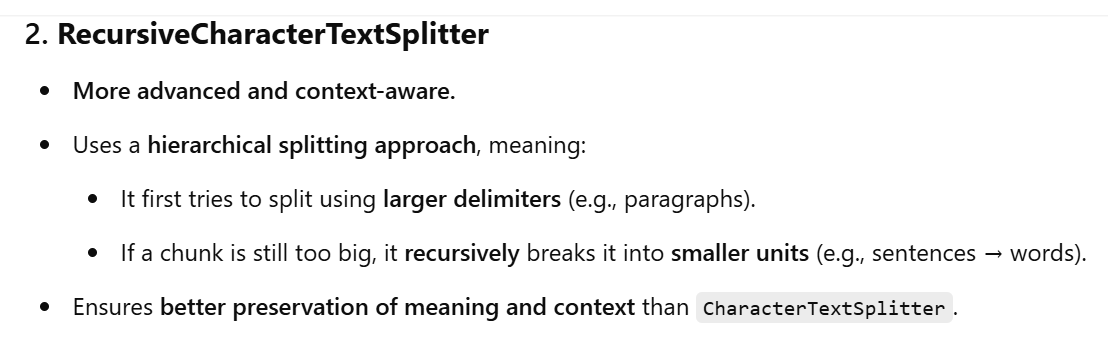

## PDF

In [1]:
from langchain_community.document_loaders import PyMuPDFLoader

file_path = "data\John_F_Kennedy.pdf"
loader = PyMuPDFLoader(file_path)

In [5]:
docs = loader.load()
docs

[Document(metadata={'source': 'data\\John_F_Kennedy.pdf', 'file_path': 'data\\John_F_Kennedy.pdf', 'page': 0, 'total_pages': 34, 'format': 'PDF 1.3', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'PyPDF2', 'creationDate': '', 'modDate': '', 'trapped': ''}, page_content="John F. Kennedy\nOval Office portrait, 1963\n35th President of the United States\nIn office\nJanuary 20, 1961\xa0– November 22, 1963\nVice President\nLyndon B. Johnson\nPreceded by\nDwight D. Eisenhower\nSucceeded by\nLyndon B. Johnson\nUnited States Senator\nfrom Massachusetts\nIn office\nJanuary 3, 1953\xa0– December 22, 1960\nPreceded by\nHenry Cabot Lodge Jr.\nSucceeded by\nBenjamin A. Smith II\nMember of the U.S. House of Representatives\nfrom Massachusetts's 11th district\nIn office\nJanuary 3, 1947\xa0– January 3, 1953\nPreceded by\nJames Michael Curley\nSucceeded by\nTip O'Neill\nPersonal details\nBorn\nJohn Fitzgerald Kennedy\nMay 29, 1917\nBrookline, Massachusetts,\nU.S.\

In [14]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

#len(all_splits)

In [15]:
all_splits

[Document(metadata={'source': 'data\\John_F_Kennedy.pdf', 'file_path': 'data\\John_F_Kennedy.pdf', 'page': 0, 'total_pages': 34, 'format': 'PDF 1.3', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'PyPDF2', 'creationDate': '', 'modDate': '', 'trapped': '', 'start_index': 0}, page_content="John F. Kennedy\nOval Office portrait, 1963\n35th President of the United States\nIn office\nJanuary 20, 1961\xa0– November 22, 1963\nVice President\nLyndon B. Johnson\nPreceded by\nDwight D. Eisenhower\nSucceeded by\nLyndon B. Johnson\nUnited States Senator\nfrom Massachusetts\nIn office\nJanuary 3, 1953\xa0– December 22, 1960\nPreceded by\nHenry Cabot Lodge Jr.\nSucceeded by\nBenjamin A. Smith II\nMember of the U.S. House of Representatives\nfrom Massachusetts's 11th district\nIn office\nJanuary 3, 1947\xa0– January 3, 1953\nPreceded by\nJames Michael Curley\nSucceeded by\nTip O'Neill\nPersonal details\nBorn\nJohn Fitzgerald Kennedy\nMay 29, 1917\nBrookline, Mas

In [16]:
len(all_splits)

142

In [20]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    #separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)


In [21]:
texts1=text_splitter.create_documents([docs[0].page_content])

In [22]:
texts = text_splitter.create_documents([docs[0].page_content])

In [23]:
len(texts)

3

In [24]:
texts

[Document(page_content="John F. Kennedy\nOval Office portrait, 1963\n35th President of the United States\nIn office\nJanuary 20, 1961\xa0– November 22, 1963\nVice President\nLyndon B. Johnson\nPreceded by\nDwight D. Eisenhower\nSucceeded by\nLyndon B. Johnson\nUnited States Senator\nfrom Massachusetts\nIn office\nJanuary 3, 1953\xa0– December 22, 1960\nPreceded by\nHenry Cabot Lodge Jr.\nSucceeded by\nBenjamin A. Smith II\nMember of the U.S. House of Representatives\nfrom Massachusetts's 11th district\nIn office\nJanuary 3, 1947\xa0– January 3, 1953\nPreceded by\nJames Michael Curley\nSucceeded by\nTip O'Neill\nPersonal details\nBorn\nJohn Fitzgerald Kennedy\nMay 29, 1917\nBrookline, Massachusetts,\nU.S.\nJohn F. Kennedy\nJohn Fitzgerald Kennedy (May 29, 1917 –\nNovember 22, 1963), often referred to as JFK, was an\nAmerican politician who served as the 35th president\nof the United States from 1961 until his assassination\nin 1963. He was the youngest person elected\npresident.[2] Kenn

In [75]:
texts[0]

Document(page_content='Be good')

In [76]:
texts[1]

Document(page_content="April 2008(This essay is derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.  We've\nlearned a lot since then, but if I were choosing now that's still\nthe one I'd pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it's so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon't worry too much about making money.  What you've got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren't supposed to be\nlike charities, and we've proven by reductio ad absurdum that one\nor both of the principles we began with is false.  Or we ha

In [77]:
texts[12]

Document(page_content="to kill, that alone more than compensates for whatever you lose by\nnot choosing a more selfish project.HelpAnother advantage of being good is that it makes other people want\nto help you.  This too seems to be an inborn trait in humans.One of the startups we've funded, Octopart, is currently locked in\na classic battle of good versus evil.  They're a search site for\nindustrial components.  A lot of people need to search for components,\nand before Octopart there was no good way to do it.  That, it turned\nout, was no coincidence.Octopart built the right way to search for components.  Users like\nit and they've been growing rapidly.  And yet for most of Octopart's\nlife, the biggest distributor, Digi-Key, has been trying to force\nthem take their prices off the site.  Octopart is sending them\ncustomers for free, and yet Digi-Key is trying to make that traffic\nstop.  Why?  Because their current business model depends on\novercharging people who have incomplete 

## text data

In [1]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [46]:
recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=26,
    chunk_overlap=4
)

In [47]:
text1 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [48]:
text2 = """
Data that Speak
LLM Applications are revolutionizing industries such as 
banking, healthcare, insurance, education, legal, tourism, 
construction, logistics, marketing, sales, customer service, 
and even public administration.

The aim of our programs is for students to learn how to 
create LLM Applications in the context of a business, 
which presents a set of challenges that are important 
to consider in advance.
"""

In [49]:
recursive_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [50]:
recursive_splitter.split_text(text2)

['Data that Speak',
 'LLM Applications are',
 'are revolutionizing',
 'industries such as',
 'banking, healthcare,',
 'insurance, education,',
 'legal, tourism,',
 'construction, logistics,',
 'marketing, sales,',
 'customer service,',
 'and even public',
 'administration.',
 'The aim of our programs',
 'is for students to learn',
 'how to',
 'create LLM Applications',
 'in the context of a',
 'a business,',
 'which presents a set of',
 'of challenges that are',
 'are important',
 'to consider in advance.']

In [52]:
second_recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)

The separators `["\n\n", "\n", "(?<=\. )", " ", ""]` refer to a sequence of characters and patterns used to split text into smaller parts, with each separator serving a specific function based on the structure of text:

1. `"\n\n"` - This separator targets double newlines, which are often used to denote separate paragraphs or sections within a text. Splitting here is intended to separate distinct thematic or topical blocks of content.

2. `"\n"` - This targets single newline characters, which typically indicate a new line within a paragraph or a soft break in the content, such as between list items or sub-paragraphs.

3. `"(?<=\. )"` - This is a regular expression that looks for a period followed by a space, typically used to signify the end of a sentence. The `(?<= )` part is a "lookbehind" assertion in regex, which means it checks for the occurrence of a period and space before splitting, but does not include them in the split, thus keeping sentences intact.

4. `" "` - This targets single space characters, which are commonly used to separate words. Splitting on spaces can break down text into individual words or phrases, especially useful when finer granularity is needed.

5. `""` - An empty string as a separator is used in text processing to split a text into its individual characters, essentially decomposing the text down to its most basic elements.

Each of these separators is used to progressively split the text into smaller and smaller chunks, starting from larger structural divisions like paragraphs and moving down to the level of individual characters, depending on the needs of the application.

In [53]:
second_recursive_splitter.split_text(text2)

['Data that Speak\nLLM Applications are revolutionizing industries such as \nbanking, healthcare, insurance, education, legal, tourism,',
 'construction, logistics, marketing, sales, customer service, \nand even public administration.',
 'The aim of our programs is for students to learn how to \ncreate LLM Applications in the context of a business,',
 'which presents a set of challenges that are important \nto consider in advance.']

In [67]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = text_splitter.split_text(text2)

chunks

['Data that Speak\nLLM Applications are revolutionizing industries such as \nbanking, healthcare, insurance, education, legal, tourism, \nconstruction, logistics, marketing, sales, customer service, \nand even public administration.\n\nThe aim of our programs is for students to learn how to \ncreate LLM Applications in the context of a business, \nwhich presents a set of challenges that are important \nto consider in advance.']

In [26]:
help(RecursiveCharacterTextSplitter)

Help on class RecursiveCharacterTextSplitter in module langchain_text_splitters.character:

class RecursiveCharacterTextSplitter(langchain_text_splitters.base.TextSplitter)
 |  RecursiveCharacterTextSplitter(separators: 'Optional[List[str]]' = None, keep_separator: "Union[bool, Literal['start', 'end']]" = True, is_separator_regex: 'bool' = False, **kwargs: 'Any') -> 'None'
 |  
 |  Splitting text by recursively look at characters.
 |  
 |  Recursively tries to split by different characters to find one
 |  that works.
 |  
 |  Method resolution order:
 |      RecursiveCharacterTextSplitter
 |      langchain_text_splitters.base.TextSplitter
 |      langchain_core.documents.transformers.BaseDocumentTransformer
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, separators: 'Optional[List[str]]' = None, keep_separator: "Union[bool, Literal['start', 'end']]" = True, is_separator_regex: 'bool' = False, **kwargs: 'Any') -> 'None'
 |      Create a new

In [25]:
dir(text_splitter)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_start_index',
 '_chunk_overlap',
 '_chunk_size',
 '_is_separator_regex',
 '_join_docs',
 '_keep_separator',
 '_length_function',
 '_merge_splits',
 '_separators',
 '_split_text',
 '_strip_whitespace',
 'atransform_documents',
 'create_documents',
 'from_huggingface_tokenizer',
 'from_language',
 'from_tiktoken_encoder',
 'get_separators_for_language',
 'split_documents',
 'split_text',
 'transform_documents']

In [68]:
len(chunks)

1

## How to execute the code from Visual Studio Code
* In Visual Studio Code, see the file 002-splitters.py
* In terminal, make sure you are in the directory of the file and run:
    * python 002-splitters.py